# **ASSIGNMENT #0003**
# **Cardiovascular Disease Diagnosis Using Image Processing**

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image

In [23]:
img_1 = Image.open('img/assn3/img5.jpg')
img_2 = Image.open('img/assn3/img2.jpg')
img_3 = Image.open('img/assn3/img6.jpg')
img_4 = Image.open('img/assn3/img7.jpg')

In [6]:
def show_fig(img1,title1,img2,title2):
    plt.figure(1,figsize=(10,10))
    plt.subplot(121)
    plt.imshow(img1,cmap='gray')
    plt.title(title1)
    #plt.xticks([]),plt.yticks([])

    plt.subplot(122)
    plt.imshow(img2,cmap='gray')
    plt.title(title2)
    #plt.xticks([]),plt.yticks([])
    plt.show()

# Definition

**Cardiovascular disease** (CVD) is a class of diseases that involve the **heart** or **blood vessels**. CVD includes **coronary artery diseases (CAD)** such as **angina** and **myocardial infarction** (commonly known as a heart attack). Other CVDs include **stroke**, **heart failure**, **hypertensive heart disease**, **rheumatic heart disease**, **cardiomyopathy**, **abnormal heart rhythms**, **congenital heart disease**, **valvular heart disease**, **carditis**, **aortic aneurysms**, **peripheral artery disease**, **thromboembolic disease**, and **venous thrombosis**.                                  

The underlying mechanisms vary depending on the disease. Coronary artery disease, stroke, and peripheral artery disease involve atherosclerosis. This may be caused by high blood pressure, smoking, diabetes mellitus, lack of exercise, obesity, high blood cholesterol, poor diet, and excessive alcohol consumption, among others. High blood pressure is estimated to account for approximately 13% of CVD deaths, while tobacco accounts for 9%, diabetes 6%, lack of exercise 6% and obesity 5%. Rheumatic heart disease may follow untreated strep throat. [Read more...](https://en.wikipedia.org/wiki/Cardiovascular_disease)

# Coronary Artery Disease (CAD) 

**Coronary artery disease** (CAD), also known as **coronary heart disease** (CHD), **ischemic heart disease** (IHD), or simply **heart disease**, involves the reduction of blood flow to the heart muscle due to build-up of plaque in the arteries of the heart. It is the most common of the cardiovascular diseases. Types include stable angina, unstable angina, myocardial infarction, and sudden cardiac death. A common symptom is chest pain or discomfort which may travel into the shoulder, arm, back, neck, or jaw. Occasionally it may feel like heartburn. Usually symptoms occur with exercise or emotional stress, last less than a few minutes, and improve with rest. Shortness of breath may also occur and sometimes no symptoms are present. In many cases, the first sign is a heart attack. Other complications include heart failure or an abnormal heartbeat. [Read more...](https://en.wikipedia.org/wiki/Coronary_artery_disease)

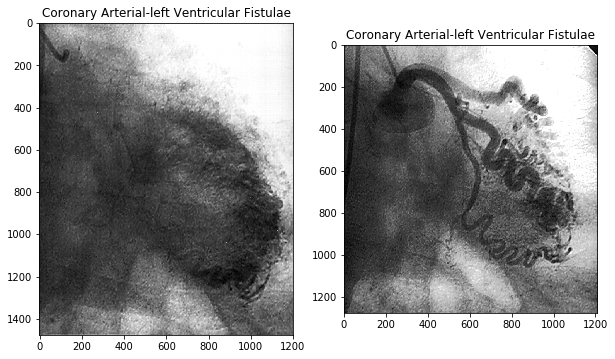

In [14]:
show_fig(img_1,"Coronary Arterial-left Ventricular Fistulae",img_2,"Coronary Arterial-left Ventricular Fistulae")

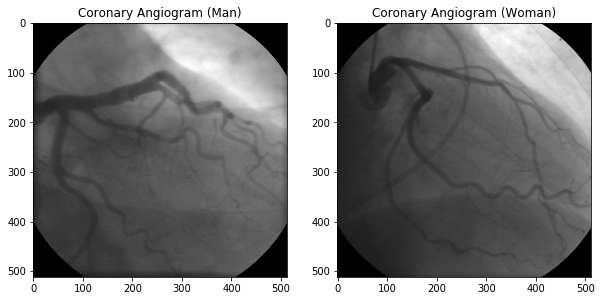

In [27]:
show_fig(img_3,"Coronary Angiogram (Man)",img_4,"Coronary Angiogram (Woman)")

The study of heart disease is important because of urgency of diagnosis. In the meantime, the discussion of image processing and diagnosis is important in medical **angiography images**, a quick diagnosis before surgery. All of these are for preventing delayin surgery. Therefore, in this study, diagnostic methods using cuckoo algorithm and medical engineering optimization methods is proposed. we presented an optimal bio inspired diagnostic model. The Coronary angiography using dedicated X-ray imaging systems has long been the preferred modality for diagnosis and treatment of Coronary Artery Disease (CAD) and its concomitants.

#### **Medical Imaging Tchniques**

True imaging and diagnosis can be very helpful to the surgeon,
and if the imaging is disturbed, it may have a bad impact on the
individual. Angiographic and interventional radiologic techniques
are also performed with injected contrast. In this instance, catheter
insertion or needle placement is performed under fluoroscopic
guidance, so that a particular vessel or organ can be see and, in
some instances, repaired via the catheter. A classic example is
angioplasty, for which a catheter is threaded into an obstructed
vessel. An attached balloon is inflated to increase the opening of the
vessel thus improving blood supply to the tissues. 

 This procedure
is commonly performed on vessels in the heart, abdomen, and legs.
As one might expect, these interventional techniques are complex
procedures, involving teams of nurses, doctors, and technologists
working together. The great advantage is that angioplasty and other
image-guided interventional procedures replace the need for (and
risks of) surgery and general anesthesia for many patients. Even for
other surgeries, the doctor may need to have a better picture and
diagnosis with higher accuracy. 

The interventional service offers more specific information and advice for patients undergoing these
procedures. Apart from rare congenital anomalies (birth defects), coronary artery disease is usually a degenerative disease, uncommon as a clinical problem before the age of 30 years and common by the age of 60 years. One in four people will have a heart attack. Cardiac blockages are detected by means of **Canny edge detector** and **Watershed** image processing algorithms implemented on [FPGA](https://en.wikipedia.org/wiki/Field-programmable_gate_array) (Field-programmable gate array).

#### **CAD Diagnosis using Edge Detection Algorithms**

In [59]:
def edge_detector(img):
    vfilter = [[-1,-2,-1], [0,0,0], [1,2,1]]
    hfilter = [[-1,0,1], [-2,0,2], [-1,0,1]]
    edges_img = img.copy()
    for row in range(3,img.shape[0]):
        for col in range(3,img.shape[1]):
            pixels = img[row-1:row+2, col-1:col+2]
            a,b = pixels.shape
            if a ==3 and b ==3:
                v_trans_pixels = vfilter*pixels
                h_trans_pixels = hfilter*pixels
                
            else:
                filtr = np.zeros((a,b),dtype=np.uint8)+1
                v_trans_pixels = filtr*pixels
                h_trans_pixels = filtr*pixels
                
            v_score = v_trans_pixels.sum()/4
            h_score = h_trans_pixels.sum()/4
            edge_score = (v_score**2 + h_score**2)**.5
            edges_img[row, col] = edge_score*3
    
    edges_img = edges_img/edges_img.max()
    return edges_img

In [69]:
def reverse_intensity(r,l):
    return l - r

In [117]:
def negative(img,l=1.0):
    rows = img.shape[0]
    cols = img.shape[1]
    negative = np.empty((rows,cols),dtype=img.dtype)
    for i in range(rows):
        for j in range (cols):
            negative[i,j] = reverse_intensity(img[i,j],l)
    return negative

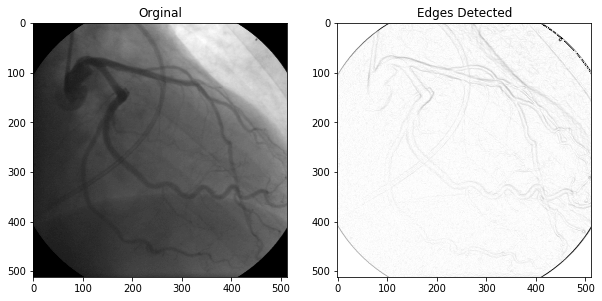

In [116]:
im = plt.imread('img/assn3/img7.jpg')
e = edge_detector(im)
n = negative(e)
show_fig(im,"Orginal",n,"Edges Detected")

#### **Using Sobel Algorithm** 

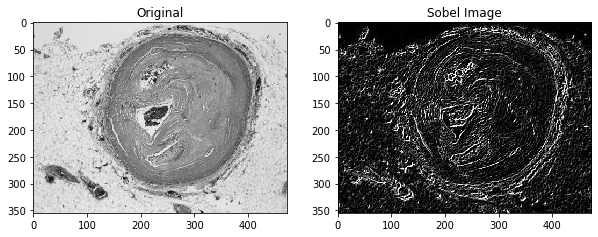

In [101]:
im = cv2.imread('img/assn3/img4.jpg')
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
horizontal = cv2.Sobel(gray,0,1,0,cv2.CV_64F)
vertical = cv2.Sobel(gray,0,0,1,cv2.CV_64F)
bitwise_or = cv2.bitwise_or(horizontal,vertical)
show_fig(gray,"Original",bitwise_or,"Sobel Image")